In [1]:
from learningAgentsNoLength import ReinforceAlgorithm
from environmentModelNoLength import Model, AdversaryModes
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import torch
import torch.nn as nn
from torch.distributions import Categorical

# Hyperparameters
def NeuralNetwork():
    lr = 0.0000001
    num_actions = 50

    nn_ = 100

    policy = nn.Sequential(
                           nn.Linear(2, nn_), 
                           nn.ReLU(),
                           nn.Linear(nn_,nn_),
                           nn.ReLU(),
                           nn.Linear(nn_,num_actions),                       
                           nn.Softmax(dim=0))
    optim = torch.optim.Adam(policy.parameters(), lr=lr)

    return policy, optim


In [3]:
game = Model(totalDemand = 400, 
             tupleCosts = (57, 71),
             terminalProb = 0.04,
             initState = [200,200], adversaryMode='guess_125')

algorithm = ReinforceAlgorithm(game, NeuralNetwork, numberIterations=1, numberEpisodes=1000000, discountFactor =0.99)
algorithm.solver()

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000


In [4]:
learning = pd.DataFrame(algorithm.returns.mean(axis = 0))

<AxesSubplot:>

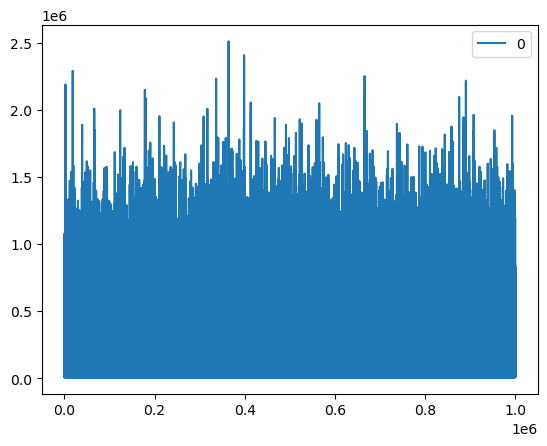

In [5]:
learning.plot()

In [6]:
from matplotlib import pyplot as plt
import numpy as np

In [7]:
learning = learning.to_numpy()
learning_2 = [0]*len(learning)
for i in range(len(learning)):
    learning_2[i] = learning[i][0]

In [14]:
avg_learning = np.convolve(learning_2, np.ones(250000)/250000, mode = 'valid')

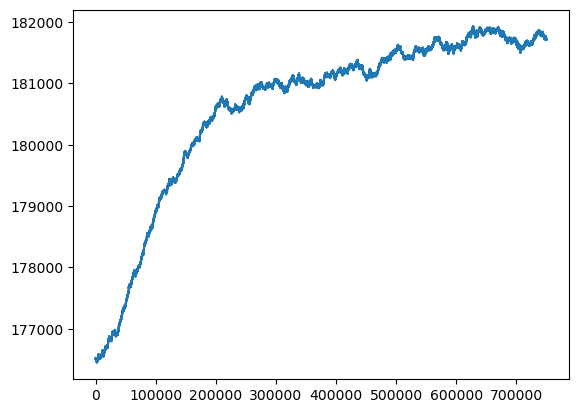

In [15]:
plt.plot(avg_learning)